#Assignment 3
###Flowers classification using CNN

###1.Dataset:https://drive.google.com/drive/folders/1WIT80rlcGoY31rMQ9z2t9RNQPdTpJDxe

In [ ]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#2.Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale = 1.0/225, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False, validation_split = 0.25)

In [ ]:
x_train = datagen.flow_from_directory('/content/drive/MyDrive/Flowers/flowers',target_size=(100,100),class_mode='categorical',subset='training')

Found 3238 images belonging to 5 classes.


In [ ]:
x_test = datagen.flow_from_directory('/content/drive/MyDrive/Flowers/flowers',target_size=(100,100),class_mode='categorical',subset='validation')

Found 1079 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

#3.Model creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
model = Sequential()

#4.Adding layers

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(100,100,3),activation='relu'))

In [ ]:

model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(5,activation='softmax'))

#5.Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#6.Fitting the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
102/102 [==============================] - 1408s 14s/step - loss: 1.6780 - accuracy: 0.4321 - val_loss: 1.2167 - val_accuracy: 0.4903
Epoch 2/15
102/102 [==============================] - 58s 568ms/step - loss: 1.0623 - accuracy: 0.5738 - val_loss: 1.2224 - val_accuracy: 0.5209
Epoch 3/15
102/102 [==============================] - 58s 568ms/step - loss: 1.0080 - accuracy: 0.6056 - val_loss: 1.0149 - val_accuracy: 0.5885
Epoch 4/15
102/102 [==============================] - 58s 566ms/step - loss: 0.9191 - accuracy: 0.6418 - val_loss: 1.0292 - val_accuracy: 0.6006
Epoch 5/15
102/102 [==============================] - 61s 599ms/step - loss: 0.8499 - accuracy: 0.6776 - val_loss: 1.0521 - val_accuracy: 0.5922
Epoch 6/15
102/102 [==============================] - 58s 567ms/step - loss: 0.8051 - accuracy: 0.6912 - val_loss: 0.9866 - val_accuracy: 0.6108
Epoch 7/15
102/102 [==============================] - 58s 564ms/step - loss: 0.7496 - accuracy: 0.7196 - val_loss: 0.9648 - val_ac

#6.Saving the model

In [24]:
model.save('flowers.h5')

#7.Testing the model

In [25]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model = load_model('flowers.h5')

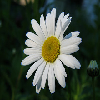

In [28]:
img = image.load_img('/content/drive/MyDrive/Flowers/flowers/daisy/2521408074_e6f86daf21_n.jpg',target_size=(100,100))
img

In [29]:
x = image.img_to_array(img)
x

array([[[ 8., 20.,  6.],
        [11., 25., 12.],
        [10., 26., 16.],
        ...,
        [38., 66., 77.],
        [28., 48., 46.],
        [17., 37., 28.]],

       [[ 8., 20.,  8.],
        [11., 25., 12.],
        [12., 28., 18.],
        ...,
        [35., 63., 75.],
        [27., 48., 49.],
        [19., 38., 36.]],

       [[ 7., 19.,  7.],
        [ 9., 22., 12.],
        [12., 29., 21.],
        ...,
        [33., 58., 63.],
        [27., 49., 47.],
        [23., 47., 47.]],

       ...,

       [[12., 27.,  6.],
        [11., 26.,  7.],
        [ 9., 22.,  5.],
        ...,
        [10., 28.,  6.],
        [10., 25.,  6.],
        [10., 25.,  6.]],

       [[12., 25.,  7.],
        [10., 23.,  6.],
        [ 9., 19.,  8.],
        ...,
        [11., 29.,  5.],
        [10., 25.,  6.],
        [10., 25.,  6.]],

       [[11., 22.,  6.],
        [ 9., 20.,  6.],
        [ 6., 16.,  8.],
        ...,
        [ 8., 26.,  4.],
        [10., 23.,  5.],
        [10., 23.,  5.]]

In [30]:
x = np.expand_dims(x, axis=0)
x

array([[[[ 8., 20.,  6.],
         [11., 25., 12.],
         [10., 26., 16.],
         ...,
         [38., 66., 77.],
         [28., 48., 46.],
         [17., 37., 28.]],

        [[ 8., 20.,  8.],
         [11., 25., 12.],
         [12., 28., 18.],
         ...,
         [35., 63., 75.],
         [27., 48., 49.],
         [19., 38., 36.]],

        [[ 7., 19.,  7.],
         [ 9., 22., 12.],
         [12., 29., 21.],
         ...,
         [33., 58., 63.],
         [27., 49., 47.],
         [23., 47., 47.]],

        ...,

        [[12., 27.,  6.],
         [11., 26.,  7.],
         [ 9., 22.,  5.],
         ...,
         [10., 28.,  6.],
         [10., 25.,  6.],
         [10., 25.,  6.]],

        [[12., 25.,  7.],
         [10., 23.,  6.],
         [ 9., 19.,  8.],
         ...,
         [11., 29.,  5.],
         [10., 25.,  6.],
         [10., 25.,  6.]],

        [[11., 22.,  6.],
         [ 9., 20.,  6.],
         [ 6., 16.,  8.],
         ...,
         [ 8., 26.,  4.],
        

In [31]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 175ms/step


array([0])

In [32]:
index = ['Daisy','Dandelion','Rose','Sunflower','Tulip']

In [33]:
index[y[0]]

'Daisy'

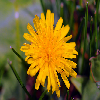

In [35]:
img = image.load_img('/content/drive/MyDrive/Flowers/flowers/dandelion/2495749544_679dc7ccef.jpg',target_size=(100,100))
img

In [52]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [25., 25., 25.],
         [21., 21., 21.],
         [ 9.,  9.,  9.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [20., 20., 20.],
         [20., 20., 20.],
         [ 7.,  7.,  7.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 7.,  7.,  7.],
        

In [38]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 35ms/step


array([3])

In [39]:
index[y[0]]

'Sunflower'

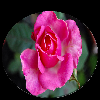

In [40]:
img = image.load_img('/content/drive/MyDrive/Flowers/flowers/rose/8050213579_48e1e7109f.jpg',target_size=(100,100))
img

In [53]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [25., 25., 25.],
         [21., 21., 21.],
         [ 9.,  9.,  9.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [20., 20., 20.],
         [20., 20., 20.],
         [ 7.,  7.,  7.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 7.,  7.,  7.],
        

In [42]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 31ms/step


array([2])

In [43]:
index[y[0]]

'Rose'

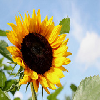

In [44]:
img = image.load_img('/content/drive/MyDrive/Flowers/flowers/sunflower/5933438337_b26a81ea81_n.jpg',target_size=(100,100))
img

In [54]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [25., 25., 25.],
         [21., 21., 21.],
         [ 9.,  9.,  9.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [20., 20., 20.],
         [20., 20., 20.],
         [ 7.,  7.,  7.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 7.,  7.,  7.],
        

In [46]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 31ms/step


array([3])

In [47]:
index[y[0]]

'Sunflower'

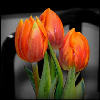

In [48]:
img = image.load_img('/content/drive/MyDrive/Flowers/flowers/tulip/2785458179_9130812eef_m.jpg',target_size=(100,100))
img

In [55]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [25., 25., 25.],
         [21., 21., 21.],
         [ 9.,  9.,  9.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [20., 20., 20.],
         [20., 20., 20.],
         [ 7.,  7.,  7.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 7.,  7.,  7.],
        

In [50]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 35ms/step


array([4])

In [51]:
index[y[0]]

'Tulip'